## NumPy入门

NumPy是Python数据科学三方库中最为重要的基石，提供了数据存储和运算的能力，其他很多跟数据科学相关的库底层都依赖了NumPy。NumPy的核心是名为`ndarray`的数据类型，用来表示任意维度的数组，相较于Python的`list`，它具有以下优势：

1. 有更好的性能，可以利用硬件的并行计算能力和缓存优化，相较于`list`在处理数据的性能上有着数量级的差异。
2. 功能更加强大，`ndarray`提供了丰富的运算和方法来处理数据，NumPy中还针对数组操作封装了大量的函数。
3. 向量化操作，NumPy中的函数以及`ndarray`的方法都是对作用于整个数组，无需使用显示的循环，代码更加简单优雅。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'].insert(0, 'SimHei')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# %save hello.py

### 创建数组对象

1. 通过`array`/`asarray`函数将列表处理成数组对象
2. 通过`arange`函数指定起始值、终止值和跨度创建数组对象
3. 通过`linspace`函数指定起始值、终止值和元素个数创建等差数列
4. 通过`logspace`函数指定起始值（指数）、终止值（指数）、元素个数、底数（默认10）创建等比数列
5. 通过`fromstring`/`fromfile`函数从字符串或文件中读取数据创建数组对象
6. 通过`fromiter`函数通过迭代器获取数据创建数组对象
7. 通过生成随机元素的方式创建数组对象
8. 通过`zeros`/`zeros_like`函数创建全0元素的数组对象
9. 通过`ones`/`ones_like`函数创建全1元素的数组对象
10. 通过`full`函数指定元素值创建数组对象
11. 通过`eye`函数创建单位矩阵
12. 通过`tile`/`repeat`函数重复元素创建数组对象

In [3]:
# 方法一：通过array函数将列表处理成数组对象
array1 = np.array([1, 2, 3, 4, 5], dtype='i4')
array1

array([1, 2, 3, 4, 5], dtype=int32)

In [4]:
type(array1)

numpy.ndarray

In [5]:
array2 = np.array([[1, 2, 3], [4, 5, 6]])
array2

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
# 方法二：通过arange函数指定范围创建数组对象
array3 = np.arange(1, 10)
array3

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
array4 = np.arange(1, 100, 3)
array4

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])

In [8]:
# 方法三：通过linspace函数创建等差数列
array5 = np.linspace(-2 * np.pi, 2 * np.pi, 120)
array6 = np.sin(array5)
array7 = np.cos(array5)

In [9]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

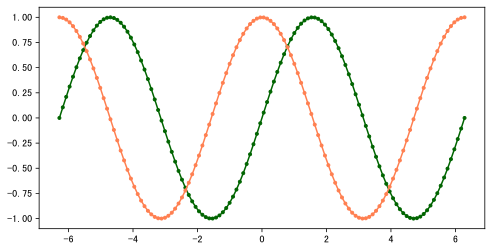

In [10]:
plt.figure(figsize=(8, 4))
# 绘制折线图
plt.plot(array5, array6, marker='.', color='darkgreen')
plt.plot(array5, array7, marker='.', color='coral')
plt.show()

In [11]:
# 方法四：通过logspace函数创建等比数列
array8 = np.logspace(0, 10, num=11, base=2, dtype='i8')
array8

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [12]:
# 方法五：通过fromstring/fromfile/fromregex函数从字符串读取数据创建数组
array9 = np.fromstring('1, 11, 111, 2, 22, 222', sep=',', dtype='i8')
array9

array([  1,  11, 111,   2,  22, 222])

In [13]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'last_expr'

In [14]:
array10 = np.fromfile('res/prime.txt', dtype='i8', sep='\n', count=15)
array10

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47])

In [15]:
# 面试官：请说一下Python中的迭代器是什么？它跟生成器是什么关系？
# 迭代器是实现了迭代器协议的对象。在Python中迭代器协议是两个魔术方法：__iter__、__next__
# 我们可以通过next函数或者for-in循环从迭代器中获取数据
# 迭代器的编写相对比较麻烦，所以在Python中可以用创建生成器的方式简化迭代器语法


def fib(count):
    a, b = 0, 1
    for _ in range(count):
        a, b = b, a + b
        yield a


gen = fib(50)
gen

<generator object fib at 0x11d65d7b0>

In [16]:
# 方法六：通过fromiter函数从迭代器中读取数据创建数组对象
array11 = np.fromiter(fib(50), dtype='i8')
array11

array([          1,           1,           2,           3,           5,
                 8,          13,          21,          34,          55,
                89,         144,         233,         377,         610,
               987,        1597,        2584,        4181,        6765,
             10946,       17711,       28657,       46368,       75025,
            121393,      196418,      317811,      514229,      832040,
           1346269,     2178309,     3524578,     5702887,     9227465,
          14930352,    24157817,    39088169,    63245986,   102334155,
         165580141,   267914296,   433494437,   701408733,  1134903170,
        1836311903,  2971215073,  4807526976,  7778742049, 12586269025])

In [17]:
# 方法七：通过生成随机元素创建数组对象
array12 = np.random.randint(0, 101, (5, 4))
array12

array([[90, 45, 91, 71],
       [85,  2, 98, 76],
       [58, 50, 72, 13],
       [66, 90, 26, 69],
       [23, 44, 68, 98]])

In [18]:
array13 = np.random.random(10)
array13

array([0.35742922, 0.49173669, 0.14993948, 0.15556126, 0.48435648,
       0.57329703, 0.7256331 , 0.96709102, 0.79687864, 0.95782978])

In [19]:
array14 = np.random.normal(169, 8.5, 5000).round(0)
array14

array([155., 173., 172., ..., 171., 176., 157.])

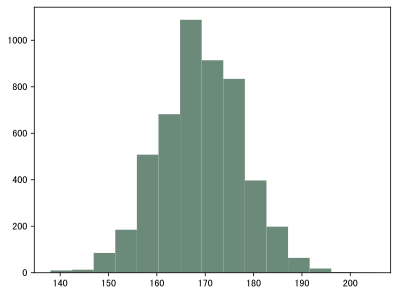

In [20]:
# 绘制直方图
plt.hist(array14, bins=15, color='#6B8A7A')
plt.show()

In [21]:
# 方法八：通过zeros/zeros_like函数创建全0元素的数组对象
array15 = np.zeros((5, 4))
array15

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [22]:
array16 = np.zeros_like(array2)
array16

array([[0, 0, 0],
       [0, 0, 0]])

In [23]:
# 方法九：通过ones/ones_like函数创建全0元素的数组对象
array17 = np.ones((5, 4))
array17

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [24]:
array18 = np.ones_like(array2)
array18

array([[1, 1, 1],
       [1, 1, 1]])

In [25]:
# 方法十：通过full函数指定值和形状创建数组对象
array19 = np.full((5, 4), 100)
array19

array([[100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100],
       [100, 100, 100, 100]])

In [26]:
# 方法十一：通过eye函数创建单位矩阵
# identify matrix --> I --> eye
array20 = np.eye(10)
array20

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [27]:
# 方法十二：通过repeat/tile函数重复元素创建数组对象
array21 = np.repeat([1, 2, 3], 10)
array21

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [28]:
array22 = np.tile([1, 2, 3], 10)
array22

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1,
       2, 3, 1, 2, 3, 1, 2, 3])

In [29]:
# 补充：读图片获得一个三维数组对象
guido_image = plt.imread('res/guido.jpg')
guido_image

array([[[ 36,  33,  28],
        [ 36,  33,  28],
        [ 36,  33,  28],
        ...,
        [ 32,  31,  29],
        [ 32,  31,  27],
        [ 31,  32,  26]],

       [[ 37,  34,  29],
        [ 38,  35,  30],
        [ 38,  35,  30],
        ...,
        [ 31,  30,  28],
        [ 31,  30,  26],
        [ 30,  31,  25]],

       [[ 38,  35,  30],
        [ 38,  35,  30],
        [ 38,  35,  30],
        ...,
        [ 30,  29,  27],
        [ 30,  29,  25],
        [ 29,  30,  25]],

       ...,

       [[239, 178, 123],
        [237, 176, 121],
        [235, 174, 119],
        ...,
        [ 78,  68,  56],
        [ 76,  66,  54],
        [ 73,  65,  52]],

       [[238, 177, 120],
        [236, 175, 118],
        [234, 173, 116],
        ...,
        [ 80,  70,  58],
        [ 78,  68,  56],
        [ 74,  67,  51]],

       [[237, 176, 119],
        [236, 175, 118],
        [234, 173, 116],
        ...,
        [ 83,  71,  59],
        [ 81,  69,  57],
        [ 77,  68,  53]]

In [30]:
guido_image.shape

(750, 500, 3)

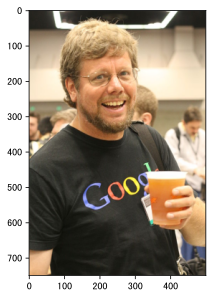

In [31]:
plt.imshow(guido_image)

### 数组对象的属性

1. `size` - 元素的个数
2. `dtype` - 元素的数据类型
3. `ndim` - 数组的维度
4. `shape` - 数组的形状
5. `itemsize` - 每个元素占用的内存空间大小（字节）
6. `nbytes` - 所有元素占用的内存空间大小（字节）
7. `T` - 转置
8. `flags` - 内存信息
9. `base` - 根基

In [32]:
array1

array([1, 2, 3, 4, 5], dtype=int32)

In [33]:
# 大小 - 元素个数
array1.size

5

In [34]:
# 数据类型
array1.dtype

dtype('int32')

In [35]:
# 维度
array1.ndim

1

In [36]:
# 形状 - 元组
array1.shape

(5,)

In [37]:
# 每个元素占用内存空间大小（字节）
array1.itemsize

4

In [38]:
# 所有元素占用内存空间大小（字节）
array1.nbytes

20

In [39]:
array2

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
array2.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [41]:
array2.size

6

In [42]:
array2.dtype

dtype('int64')

In [43]:
array2.ndim

2

In [44]:
array2.shape

(2, 3)

In [45]:
array2.itemsize

8

In [46]:
array2.nbytes

48

In [47]:
array2.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [48]:
guido_image.size

1125000

In [49]:
guido_image.dtype

dtype('uint8')

In [50]:
guido_image.ndim

3

In [51]:
guido_image.shape

(750, 500, 3)

In [52]:
guido_image.itemsize

1

In [53]:
guido_image.nbytes

1125000

### 数组对象的运算

#### 算术运算

1. 与标量运算
2. 与数组运算 - 两个数组形状相同

In [54]:
array1 + 10

array([11, 12, 13, 14, 15], dtype=int32)

In [55]:
array2 * 5

array([[ 5, 10, 15],
       [20, 25, 30]])

In [56]:
array2 ** 2

array([[ 1,  4,  9],
       [16, 25, 36]])

In [57]:
temp1 = np.random.randint(1, 10, (2, 3))
temp1

array([[1, 1, 3],
       [4, 7, 2]])

In [58]:
temp1 + array2

array([[ 2,  3,  6],
       [ 8, 12,  8]])

In [59]:
temp1 * array2

array([[ 1,  2,  9],
       [16, 35, 12]])

In [60]:
temp1 ** array2

array([[    1,     1,    27],
       [  256, 16807,    64]])

#### 比较运算

1. 与标量运算
2. 与数组运算

In [61]:
array1 > 3

array([False, False, False,  True,  True])

In [62]:
array2 > 3

array([[False, False, False],
       [ True,  True,  True]])

In [63]:
temp1 > array2

array([[False, False, False],
       [False,  True, False]])

In [64]:
temp1 == array2

array([[ True, False,  True],
       [ True, False, False]])

#### 逻辑运算

1. 与标量的运算
2. 与数组的运算

In [65]:
temp2 = np.array([True, False, True, False, True])
temp3 = np.array([True, False, False, False, True])

In [66]:
temp2 & True

array([ True, False,  True, False,  True])

In [67]:
temp2 | True

array([ True,  True,  True,  True,  True])

In [68]:
temp2 & temp3

array([ True, False, False, False,  True])

In [69]:
temp2 | temp3

array([ True, False,  True, False,  True])

In [70]:
~temp2

array([False,  True, False,  True, False])

#### 索引运算

1. 普通索引 - 跟列表的索引运算类似
2. 花式索引 - 用列表或数组充当数组的索引
3. 布尔索引 - 用保存布尔值的数组充当索引
4. 切片索引 - 跟列表的切片运算类似

In [71]:
temp4 = np.random.randint(1, 100, 9)
temp4

array([42, 49, 40, 75, 55, 99, 44, 80, 74])

In [72]:
temp4[5]

np.int64(99)

In [73]:
temp4[-4]

np.int64(99)

In [74]:
temp4[5] = 99
temp4

array([42, 49, 40, 75, 55, 99, 44, 80, 74])

In [75]:
temp5 = np.random.randint(1, 100, (4, 5))
temp5

array([[95, 91, 74, 23, 37],
       [90, 74, 38, 87, 24],
       [ 9, 85, 23, 33, 36],
       [86, 76, 57, 12, 22]])

In [76]:
temp5[1][2]

np.int64(38)

In [77]:
temp5[1, 2]

np.int64(38)

In [78]:
temp5[-1, -1] = 99
temp5

array([[95, 91, 74, 23, 37],
       [90, 74, 38, 87, 24],
       [ 9, 85, 23, 33, 36],
       [86, 76, 57, 12, 99]])

In [79]:
temp5[-1, 1] = 55
temp5

array([[95, 91, 74, 23, 37],
       [90, 74, 38, 87, 24],
       [ 9, 85, 23, 33, 36],
       [86, 55, 57, 12, 99]])

In [80]:
guido_image[0]

array([[36, 33, 28],
       [36, 33, 28],
       [36, 33, 28],
       ...,
       [32, 31, 29],
       [32, 31, 27],
       [31, 32, 26]], dtype=uint8)

In [81]:
guido_image[0, 0]

array([36, 33, 28], dtype=uint8)

In [82]:
guido_image[0, 0, 1]

np.uint8(33)

In [83]:
# 花式索引 - fancy index - 用放整数的列表或者数组充当数组的索引
temp4[[1, 1, 1, 2, 2, -2, -4, -4]]

array([49, 49, 49, 40, 40, 80, 99, 99])

In [84]:
temp5[[0, 1, 1, 2, 0, 0, 0], [3, 1, 1, -2, -2, -2, -2]]

array([23, 74, 74, 33, 23, 23, 23])

In [85]:
# 布尔索引 - 用放布尔值的数组或列表充当数组的索引 - 实现数据筛选
temp4[[True, False, False, True, False, True, False, True, False]]

array([42, 75, 99, 80])

In [86]:
temp4 > 70

array([False, False, False,  True, False,  True, False,  True,  True])

In [87]:
temp4[temp4 > 70]

array([75, 99, 80, 74])

In [88]:
temp4 % 2 == 0

array([ True, False,  True, False, False, False,  True,  True,  True])

In [89]:
temp4[temp4 % 2 == 0]

array([42, 40, 44, 80, 74])

In [90]:
(temp4 > 70) & (temp4 % 2 == 0)

array([False, False, False, False, False, False, False,  True,  True])

In [91]:
temp4[(temp4 > 70) & (temp4 % 2 == 0)]

array([80, 74])

In [92]:
temp4[(temp4 > 70) | (temp4 % 2 == 0)]

array([42, 40, 75, 99, 44, 80, 74])

In [93]:
temp5 > 70

array([[ True,  True,  True, False, False],
       [ True,  True, False,  True, False],
       [False,  True, False, False, False],
       [ True, False, False, False,  True]])

In [94]:
temp5[temp5 > 70]

array([95, 91, 74, 90, 74, 87, 85, 86, 99])

In [95]:
temp5[(temp5 > 70) & (temp5 % 2 == 0)]

array([74, 90, 74, 86])

In [96]:
temp4

array([42, 49, 40, 75, 55, 99, 44, 80, 74])

In [97]:
# 切片索引 - slice
temp4[2:7]

array([40, 75, 55, 99, 44])

In [98]:
# 切片索引 - slice
temp4[2:7:2]

array([40, 55, 44])

In [99]:
temp4[6:1:-1]

array([44, 99, 55, 75, 40])

In [100]:
temp5

array([[95, 91, 74, 23, 37],
       [90, 74, 38, 87, 24],
       [ 9, 85, 23, 33, 36],
       [86, 55, 57, 12, 99]])

In [101]:
temp5[1:3, 1:4]

array([[74, 38, 87],
       [85, 23, 33]])

In [102]:
temp5[2:, 3:]

array([[33, 36],
       [12, 99]])

In [103]:
temp5[2:, 2:4]

array([[23, 33],
       [57, 12]])

In [104]:
temp5[:3, :3]

array([[95, 91, 74],
       [90, 74, 38],
       [ 9, 85, 23]])

In [105]:
temp5[:, :3]

array([[95, 91, 74],
       [90, 74, 38],
       [ 9, 85, 23],
       [86, 55, 57]])

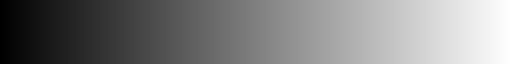

In [106]:
plt.get_cmap('gray')

In [107]:
np.mean(guido_image, axis=2) >= 128

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

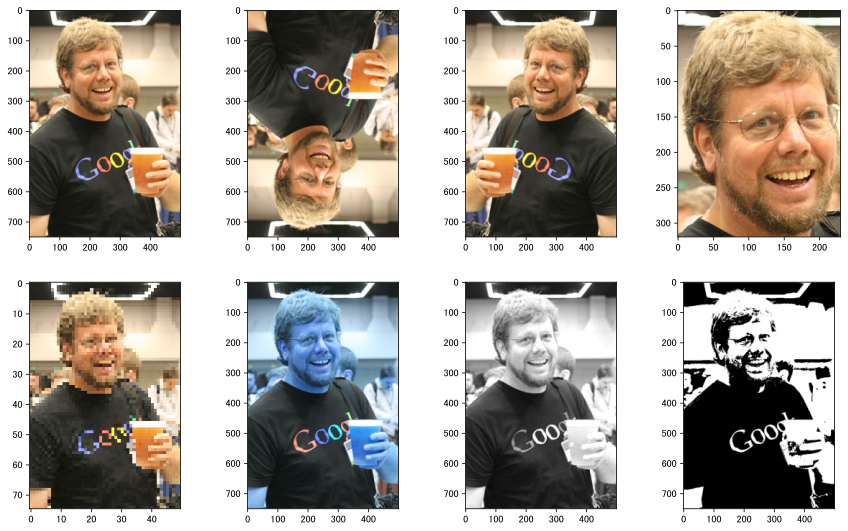

In [138]:
# 创建画布
plt.figure(figsize=(15, 9))

# 原图
# 创建坐标系
plt.subplot(2, 4, 1)
plt.imshow(guido_image)
# 垂直翻转
plt.subplot(2, 4, 2)
plt.imshow(guido_image[::-1])
# 水平翻转
plt.subplot(2, 4, 3)
plt.imshow(guido_image[:, ::-1])
# 抠图
plt.subplot(2, 4, 4)
plt.imshow(guido_image[30:350, 80:310])
# 降采样
plt.subplot(2, 4, 5)
plt.imshow(guido_image[::10, ::10])
# 反色
plt.subplot(2, 4, 6)
plt.imshow(guido_image[:, :, ::-1])
# 灰度图
plt.subplot(2, 4, 7)
plt.imshow(guido_image[:, :, 0], cmap=plt.cm.gray)
# 二值化
plt.subplot(2, 4, 8)
plt.imshow(np.mean(guido_image, axis=2) >= 128, cmap='gray')

plt.show()

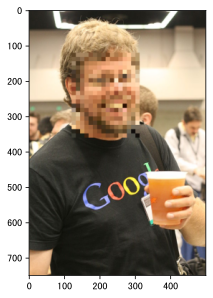

In [154]:
# 局部马赛克效果
guido_image_copy = guido_image.copy()

n = 12

for i in range(120, 350, n):
    for j in range(120, 310, n):
        color = guido_image_copy[i, j]
        guido_image_copy[i: i + n, j: j + n] = color

plt.imshow(guido_image_copy)

In [110]:
# %pip install pillow

In [111]:
# from PIL import Image

# 灰度图
# Image.fromarray(guido_image[:, :, 0]).show()

In [112]:
# from PIL import ImageFilter

# 滤镜效果
# Image.fromarray(guido_image).filter(ImageFilter.CONTOUR).show()

In [113]:
obama_image = plt.imread('res/obama.jpg')
obama_image.shape

(750, 500, 3)

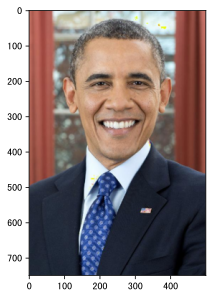

In [114]:
plt.imshow(obama_image)

In [115]:
temp6 = (guido_image * 0.6 + obama_image * 0.4).astype('u1')
temp6.shape

(750, 500, 3)

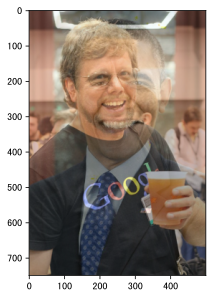

In [116]:
plt.imshow(temp6)

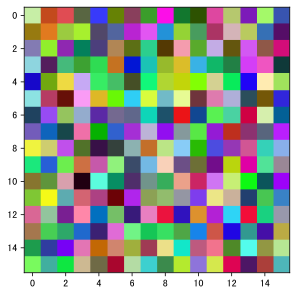

In [117]:
temp7 = np.random.randint(0, 256, (16, 16, 3))
plt.imshow(temp7)

### 数组对象的方法

1. 获取描述性统计信息
   - `sum`
   - `cumsum` / `cumprod`
   - `mean`
   - `np.median`
   - `stats.mode`
   - `max`
   - `min`
   - `ptp`
   - `np.quantile` / `stats.iqr`
   - `var`
   - `std`
   - `stats.variation`
   - `stats.skew`
   - `stats.kurtosis`
2. 其他相关方法
   - `round`
   - `argmax` / `argmin`
   - `nonzero`
   - `copy` / `view`
   - `astype`
   - `clip`
   - `reshape` / `resize`
   - `dump` / `np.load`
   - `tofile`
   - `fill`
   - `flatten` / `ravel`
   - `sort` / `argsort`
   - `swapaxes` / `transpose`
   - `tolist`

In [118]:
# %pip install -U scipy

In [119]:
from scipy import stats

In [120]:
scores1 = np.fromstring(
    '76, 81, 85, 79, 83, 82, 91, 80, 87, 86, '
    '70, 82, 84, 77, 83, 85, 76, 74, 80, 80, '
    '82, 76, 68, 77, 80, 78, 77, 73, 81, 76, '
    '85, 81, 84, 85, 74, 84, 70, 76, 78, 80, '
    '86, 75, 94, 79, 84, 78, 72, 86, 74, 68', 
    sep=',',
    dtype='i8'
)
scores1

array([76, 81, 85, 79, 83, 82, 91, 80, 87, 86, 70, 82, 84, 77, 83, 85, 76,
       74, 80, 80, 82, 76, 68, 77, 80, 78, 77, 73, 81, 76, 85, 81, 84, 85,
       74, 84, 70, 76, 78, 80, 86, 75, 94, 79, 84, 78, 72, 86, 74, 68])

In [121]:
# 求和
scores1.sum()

np.int64(3982)

In [122]:
np.sum(scores1)

np.int64(3982)

In [123]:
# 累积和 - cumulative sum
scores1.cumsum()

array([  76,  157,  242,  321,  404,  486,  577,  657,  744,  830,  900,
        982, 1066, 1143, 1226, 1311, 1387, 1461, 1541, 1621, 1703, 1779,
       1847, 1924, 2004, 2082, 2159, 2232, 2313, 2389, 2474, 2555, 2639,
       2724, 2798, 2882, 2952, 3028, 3106, 3186, 3272, 3347, 3441, 3520,
       3604, 3682, 3754, 3840, 3914, 3982])

In [124]:
np.cumsum(scores1)

array([  76,  157,  242,  321,  404,  486,  577,  657,  744,  830,  900,
        982, 1066, 1143, 1226, 1311, 1387, 1461, 1541, 1621, 1703, 1779,
       1847, 1924, 2004, 2082, 2159, 2232, 2313, 2389, 2474, 2555, 2639,
       2724, 2798, 2882, 2952, 3028, 3106, 3186, 3272, 3347, 3441, 3520,
       3604, 3682, 3754, 3840, 3914, 3982])

In [125]:
# 算术平均
scores1.mean()

np.float64(79.64)

In [126]:
np.mean(scores1)

np.float64(79.64)

In [127]:
# 几何平均
stats.gmean(scores1)

np.float64(79.44812732667022)

In [128]:
# 调和平均
stats.hmean(scores1)

np.float64(79.25499854665681)

In [129]:
# 去尾平均
stats.tmean(scores1, [70, 90])

np.float64(79.58695652173913)

In [130]:
np.mean(scores1[(scores1 >= 70) & (scores1 <= 90)])

np.float64(79.58695652173913)

In [131]:
# 中位数
np.median(scores1)

np.float64(80.0)

In [132]:
# 众数
result = stats.mode(scores1)
result.mode, result.count

(np.int64(76), np.int64(5))

In [133]:
# 最大值
scores1.max()

np.int64(94)

In [134]:
np.amax(scores1)

np.int64(94)

In [135]:
# 最小值
scores1.min()

np.int64(68)

In [136]:
np.amin(scores1)

np.int64(68)

In [ ]:
# 全距（极差）
np.ptp(scores1)

In [ ]:
# 四分位距离
q1, q3 = np.quantile(scores1, [0.25, 0.75])
q3 - q1

In [ ]:
# inter-quartile range
stats.iqr(scores1)

In [ ]:
# 总体方差
scores1.var()

In [ ]:
np.var(scores1)

In [ ]:
# 样本方差
scores1.var(ddof=1)

In [ ]:
np.var(scores1, ddof=1)

In [ ]:
# 总体标准差
np.std(scores1)

In [ ]:
# 样本标准差
np.std(scores1, ddof=1)

In [ ]:
# 变异系数
stats.variation(scores1)

In [ ]:
# 偏态系数
stats.skew(scores1)

In [ ]:
# 峰度系数
stats.kurtosis(scores1)

In [ ]:
# 箱线图
plt.boxplot(scores1, showmeans=True, whis=1.5)
plt.show()

In [ ]:
# 直方图
plt.hist(scores1, bins=6)
plt.show()

In [ ]:
# 设置随机数的种子
np.random.seed(12)

In [ ]:
scores2 = np.random.randint(60, 101, (10, 3))
scores2

In [ ]:
scores2.mean()

In [ ]:
scores2.mean(axis=0)

In [ ]:
scores2.mean(axis=1).round(1)

In [ ]:
# axis=0 - 默认值 - 沿着0轴计算
stats.describe(scores2)

In [ ]:
# axis=None - 不沿着任何一个轴计算
stats.describe(scores2, axis=None)

In [ ]:
# axis=1 - 沿着1轴计算
result = stats.describe(scores2, axis=1)
result

In [ ]:
result.mean.round(1)

In [ ]:
result.variance.round(2)

In [ ]:
plt.boxplot(scores2, showmeans=True)
plt.show()

In [ ]:
np.random.seed(14)

In [ ]:
temp8 = np.random.random(10)
temp8

In [ ]:
# 四舍五入
temp9 = temp8.round(1)
temp9

In [ ]:
# 最大值的索引
temp8.argmax()

In [ ]:
# 最小值的索引
temp8.argmin()

In [ ]:
# 调整数组的形状
temp10 = temp8.reshape((5, 2))
# temp10 = temp8.reshape((5, 2)).copy()
temp10

In [ ]:
temp10.base

In [ ]:
temp10.flags

In [ ]:
temp10.base is temp8

In [ ]:
temp10[2, 1] = 0.999999
temp10

In [ ]:
temp8

In [ ]:
temp8[3] = 0.0001
temp8

In [ ]:
temp10

In [ ]:
# 调整数组大小
temp8.resize((3, 5), refcheck=False)
temp8.round(1)

In [ ]:
temp11 = np.resize(temp8, (4, 5)).round(1)
temp11

In [ ]:
# 非零元素的索引
temp9.nonzero()

In [ ]:
# 类型转换
temp12 = np.random.randint(-100, 101, 10)
temp12

In [ ]:
temp12.astype(np.float64)

In [ ]:
temp12.astype('f8')

In [ ]:
temp12.astype('i1')

In [ ]:
temp13 = temp12.astype('u1')
temp13

In [ ]:
temp13.flags

In [ ]:
temp12.astype('U')

In [ ]:
# 修剪
temp9.clip(min=0.3, max=0.7)

In [ ]:
# 将数组持久化到（文本）文件
temp11.tofile('temp11.txt', sep=',')

In [ ]:
temp13 = np.fromfile('temp11.txt', sep=',').reshape(4, 5)
temp13

In [ ]:
# 将数组持久化到（二进制）文件
temp11.dump('temp11')

In [ ]:
# 从二进制文件（pickle序列化）中加载数组
temp14 = np.load('temp11', allow_pickle=True)
temp14

In [ ]:
temp15 = np.random.randint(1, 100, (2, 3, 4))
temp15

In [ ]:
# 扁平化
temp16 = temp15.flatten()
temp16

In [ ]:
# 扁平化
temp17 = temp15.ravel()
temp17

In [ ]:
temp16.base is temp15

In [ ]:
temp16.flags

In [ ]:
temp17.base is temp15

In [ ]:
temp17.flags

In [ ]:
temp16[0] = 999
temp16

In [ ]:
temp15

In [ ]:
temp17[0] = 88
temp17

In [ ]:
temp15

In [ ]:
# 排序 - 返回排序后的新数组
np.sort(temp16)[::-1]

In [ ]:
# 排序 - 就地排序
temp16.sort()
temp16

In [ ]:
temp18 = np.random.randint(1, 100, 10)
temp18

In [ ]:
# 给出索引的顺序 - 花式索引
temp18[temp18.argsort()]

In [ ]:
# 转置
temp11.transpose()

In [ ]:
temp11.T

In [ ]:
# 交换轴
temp11.swapaxes(0, 1)

In [ ]:
temp15

In [ ]:
temp15.swapaxes(0, 1)

In [ ]:
temp15.swapaxes(1, 2)

In [ ]:
# 将数组处理成列表
list1 = temp16.tolist()
print(list1)

In [ ]:
list2 = temp11.tolist()
print(list2)

In [ ]:
list3 = temp15.tolist()
print(list3)